# Homework 1: Linear Regression and Classification in PyTorch

## Part 1: Regression warm-up

In [1]:
# You probably won't need additional imports for this part
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.nn.functional as F # ReLU is here

In [2]:
# Load and Prepare the Dataset
diabetes_data = load_diabetes()
X, y = diabetes_data.data, diabetes_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (353, 10)
X_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)


In [4]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Theoretical questions

Q1: Why do we need to scale the data? What will happen if we forget this step?


Q2: Why are we using the training set parameters to perform the scaling on both training and testing datasets? What is the problem with scaling the datasets according to all the data (train+test) or to scale the training and testing separately?

## Your answers in this cell

### A1:
*My intuitive answer: <br>
In a dataset, some features inherently have larger values (for example house size) while others have smaller values (for example number of rooms). If features have disparate scales, the model might disproportionately emphasize the feature with a larger scale during training, potentially leading to biased predictions. Feature scaling ensures a consistent scale, mitigating bias in the process. <br>

*Another reminder that came up thanks to the chat:<br>
Facilitating Convergence: Many machine learning algorithms, including neural networks, converge faster when features are on a similar scale. This is particularly important for optimization algorithms like gradient descent, as it helps the algorithm find the optimal solution more efficiently.<br>

Improving Numerical Stability: Large-scale differences in feature values can lead to numerical instability in certain calculations. Scaling mitigates this issue and makes the optimization process more stable.<br>

So- if we forget to scale the data, the model may be sensitive to the scale of features, to give undue importance to certain features over others and might take longer to converge.

### A2:
We use the parameters from the training set to scale both the training and testing datasets, aiming to prevent information leakage and reliable performance evaluation. The issue with scaling the datasets based on all available data is that it introduces information to our model that should remain unseen. This can result in overly optimistic performance estimates during both training and testing, as the model indirectly gains exposure to parts of the test set during the scaling process. We avoid scaling training and testing separately to maintain consistent scaling for model understanding. Additionally, in scenarios where the model predicts a single example, using consistent scaling ensures seamless application without the need for separate adjustments.

In [5]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [6]:
class LinearRegressionModel(nn.Module):
    '''    
    Every network in PyTorch can (and should) be defined as a class.
    Every class should have an init method containing the layers and a forward 
    method that defines how the layers are connected. This is often called 
    the architecture of the network.

    A linear regression model predicts a continuous value using a linear function.
    In PyTorch, this can be implemented using a fully connected layer without any 
    activation functions (also known as a Linear layer in PyTorch).

    Define a linear regression model with a single Linear layer.
    Documentation: https://pytorch.org/docs/stable/nn.html#linear-layers
    '''
    def __init__(self, n_features):
        super(LinearRegressionModel, self).__init__()
        self.layer=nn.Linear(n_features,1)
      
    def forward(self, x):
        y_hat = None
        y_hat=self.layer(x)
        return y_hat

In [7]:
def train_and_test_model(model, X_train, y_train, X_test, y_test, num_epochs, criterion, optimizer):
    '''
    This function handles the training. It takes the model, data, number of iterations,
    loss function and optimizer and performs training and logging of loss values for
    debugging and analysis. This function should work for both the linear regression 
    model and the deep model, without any specific checks.
    '''
    
    train_losses = []
    test_losses = []
    model.train()
    for epoch in range(num_epochs):
        
        # Forward pass (use model to get outputs, and calculate loss)
        y_hat = model(X_train)  # forward pass
        loss = criterion(y_hat, y_train.view(-1, 1))  # calculate loss
    
        # Backward pass: zero gradients, calculate gradients and do the update step
        loss.backward()  # Backward pass - calculate gradients
        optimizer.step()  # Optimization step
        optimizer.zero_grad()  # Zero the gradients (This is how the backward was developed)

        train_losses.append(loss.item())

        # Test the model every 100 epochs
        if (epoch + 1) % 100 == 0:
            model.eval()  # Set the model to evaluation mode
            with torch.no_grad():
                y_predicted = model.forward(X_test)
                test_loss = criterion(y_predicted, y_test.view(-1, 1))
                test_losses.append(test_loss.item())
                print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
            model.train()  # Set the model back to training mode

    # Final test
    model.eval()
    with torch.no_grad():
        y_predicted = model(X_test)
        test_loss = criterion(y_predicted, y_test.view(-1, 1))
        print(f'Test Loss: {test_loss.item():.4f}')

    return train_losses, test_losses


In [8]:
num_epochs = 1000

linear_model = LinearRegressionModel(X_train.shape[1])
criterion = nn.MSELoss()

# Make sure the optimizer gets the parameters of the model you are training
# You might need to change the learning rate for different architectures
optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.01)

train_losses, test_losses = train_and_test_model(linear_model, 
                                                 X_train, y_train, 
                                                 X_test, y_test, 
                                                 num_epochs, 
                                                 criterion, 
                                                 optimizer)

Epoch [100/1000], Loss: 3208.0984, Test Loss: 3724.3977
Epoch [200/1000], Loss: 2759.5396, Test Loss: 3440.3992
Epoch [300/1000], Loss: 2749.8567, Test Loss: 3458.7844
Epoch [400/1000], Loss: 2748.9185, Test Loss: 3463.7324
Epoch [500/1000], Loss: 2748.3047, Test Loss: 3464.5371
Epoch [600/1000], Loss: 2747.7522, Test Loss: 3464.2322
Epoch [700/1000], Loss: 2747.2358, Test Loss: 3463.5796
Epoch [800/1000], Loss: 2746.7483, Test Loss: 3462.8123
Epoch [900/1000], Loss: 2746.2856, Test Loss: 3462.0120
Epoch [1000/1000], Loss: 2745.8455, Test Loss: 3461.2083
Test Loss: 3461.2083


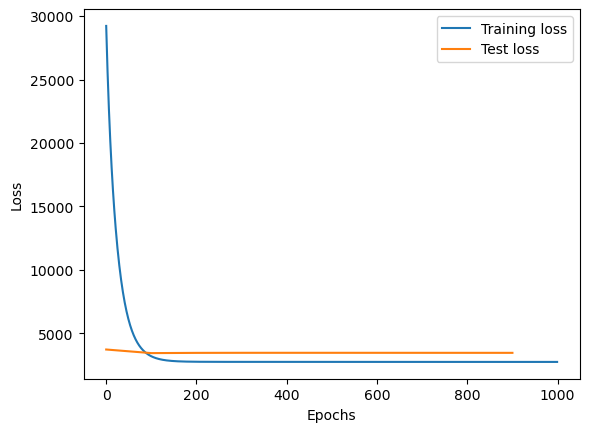

In [9]:
plt.plot(train_losses, label='Training loss')
plt.plot(np.arange(0, num_epochs, 100), test_losses, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training Loss: The training loss decreases steadily over the epochs, indicating that the model is learning and adjusting its parameters to minimize the loss on the training data.
Test Loss: The test loss also decreases initially but starts to stabilize. This suggests that the model is performing well on both the training and test sets, and the learning rate of 0.01 is allowing the model to converge effectively. <br>
As we know, an excessively large learning rate may prevent convergence (resulting in divergence), while a learning rate that is overly small leads to slow convergence and a potential risk of getting trapped in a local minimum. Therefore, we will explore two additional options for the learning rate.

In [10]:
optimizer2 = torch.optim.SGD(linear_model.parameters(), lr=0.1)

train_losses_lr2, test_losses_lr2 = train_and_test_model(linear_model, 
                                                 X_train, y_train, 
                                                 X_test, y_test, 
                                                 num_epochs, 
                                                 criterion, 
                                                 optimizer2)

optimizer3 = torch.optim.SGD(linear_model.parameters(), lr=0.001)

train_losses_lr3, test_losses_lr3 = train_and_test_model(linear_model, 
                                                 X_train, y_train, 
                                                 X_test, y_test, 
                                                 num_epochs, 
                                                 criterion, 
                                                 optimizer3)

Epoch [100/1000], Loss: 2742.3589, Test Loss: 3453.9434
Epoch [200/1000], Loss: 2739.9678, Test Loss: 3448.1458
Epoch [300/1000], Loss: 2738.3267, Test Loss: 3443.5544
Epoch [400/1000], Loss: 2737.1997, Test Loss: 3439.9072
Epoch [500/1000], Loss: 2736.4260, Test Loss: 3436.9946
Epoch [600/1000], Loss: 2735.8945, Test Loss: 3434.6565
Epoch [700/1000], Loss: 2735.5295, Test Loss: 3432.7715
Epoch [800/1000], Loss: 2735.2788, Test Loss: 3431.2446
Epoch [900/1000], Loss: 2735.1067, Test Loss: 3430.0042
Epoch [1000/1000], Loss: 2734.9885, Test Loss: 3428.9929
Test Loss: 3428.9929
Epoch [100/1000], Loss: 2734.9868, Test Loss: 3428.9810
Epoch [200/1000], Loss: 2734.9856, Test Loss: 3428.9697
Epoch [300/1000], Loss: 2734.9849, Test Loss: 3428.9600
Epoch [400/1000], Loss: 2734.9836, Test Loss: 3428.9517
Epoch [500/1000], Loss: 2734.9829, Test Loss: 3428.9429
Epoch [600/1000], Loss: 2734.9819, Test Loss: 3428.9346
Epoch [700/1000], Loss: 2734.9810, Test Loss: 3428.9260
Epoch [800/1000], Loss: 27

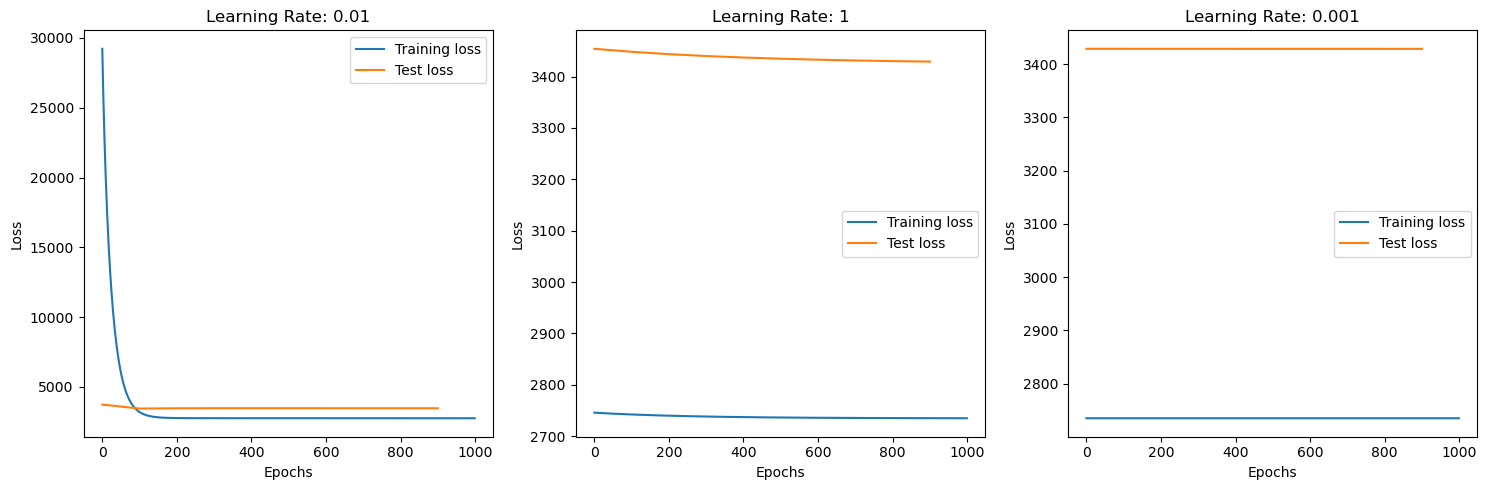

In [11]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for learning rate 0.01
axes[0].plot(train_losses, label='Training loss')
axes[0].plot(np.arange(0, num_epochs, 100), test_losses, label='Test loss')
axes[0].set_title('Learning Rate: 0.01')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot for learning rate 1
axes[1].plot(train_losses_lr2, label='Training loss')
axes[1].plot(np.arange(0, num_epochs, 100), test_losses_lr2, label='Test loss')
axes[1].set_title('Learning Rate: 1')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Plot for learning rate 0.001
axes[2].plot(train_losses_lr3, label='Training loss')
axes[2].plot(np.arange(0, num_epochs, 100), test_losses_lr3, label='Test loss')
axes[2].set_title('Learning Rate: 0.001')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('Loss')
axes[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

Learning Rate Impact:<br>
0.01: Balanced convergence, both training and test losses decrease steadily.<br>
0.1: Rapid initial convergence, but the test loss starts oscillating, indicating instability.<br>
0.001: Slow convergence for both training and test losses, suggesting the learning rate is too small.<br>
A learning rate of 0.01 appears to be a suitable balance between convergence speed and stability for this task.

Now you will create a deep neural network, with non-linear activations.

In [12]:
class DeepRegressionModel(nn.Module):
    '''
    A deep neural network for regression can have multiple layers.
    Each layer is fully connected, followed by a non-linear activation 
    function (except for the output layer in regression models).

    Define a network with multiple Linear layers and ReLU activations.
    Documentation:
    - Activation functions: https://pytorch.org/docs/stable/nn.html#non-linear-activation-functions
    '''
    def __init__(self, n_features):
        super(DeepRegressionModel, self).__init__()
        self.linear_layer1= nn.Linear(n_features,250)
        self.linear_layer2= nn.Linear(250,150)
        self.linear_layer3= nn.Linear(150,1)
        
    def forward(self, x):
        y_hat = None
        x=self.linear_layer1(x)
        x = nn.ReLU()(x)
        x=self.linear_layer2(x)
        x = nn.ReLU()(x)
        y_hat = self.linear_layer3(x)
        return y_hat

In [13]:
num_epochs = 1000

deep_model = DeepRegressionModel(X_train.shape[1])
criterion = nn.MSELoss()

# Make sure the optimizer gets the parameters of the model you are training
# You might need to change the learning rate for different architectures
optimizer = torch.optim.SGD(deep_model.parameters(), lr=0.00001)

train_losses, test_losses = train_and_test_model(deep_model, 
                                                 X_train, y_train, 
                                                 X_test, y_test, 
                                                 num_epochs, 
                                                 criterion, 
                                                 optimizer)

Epoch [100/1000], Loss: 27808.3125, Test Loss: 27616.6484
Epoch [200/1000], Loss: 13738.6348, Test Loss: 13729.3262
Epoch [300/1000], Loss: 3496.8115, Test Loss: 3528.7566
Epoch [400/1000], Loss: 3000.8921, Test Loss: 3421.7668
Epoch [500/1000], Loss: 2828.2295, Test Loss: 3432.5972
Epoch [600/1000], Loss: 2731.9915, Test Loss: 3437.5491
Epoch [700/1000], Loss: 2666.1580, Test Loss: 3438.9456
Epoch [800/1000], Loss: 2618.3442, Test Loss: 3439.0042
Epoch [900/1000], Loss: 2581.2029, Test Loss: 3439.7236
Epoch [1000/1000], Loss: 2550.5715, Test Loss: 3441.6057
Test Loss: 3441.6057


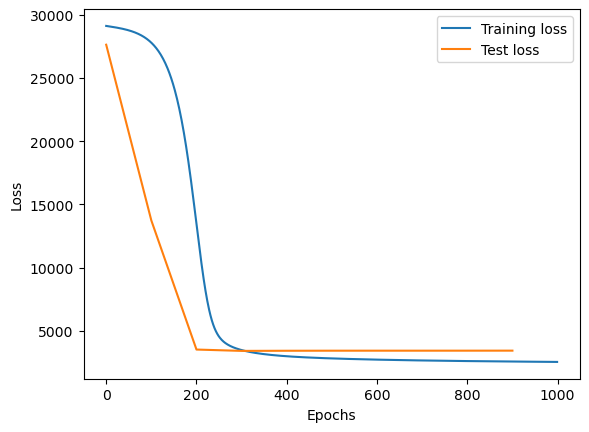

In [14]:
plt.plot(train_losses, label='Training loss')
plt.plot(np.arange(0, num_epochs, 100), test_losses, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
def print_model_architecture(model, name):
    print(f"Architecture details for {name}:")
    print(model)
    print("\n")

# Model 1
class DeepRegressionModel(nn.Module):
    def __init__(self, n_features):
        super(DeepRegressionModel, self).__init__()
        self.linear_layer1= nn.Linear(n_features,250)
        self.linear_layer2= nn.Linear(250,150)
        self.linear_layer3= nn.Linear(150,1)

    def forward(self, x):
        y_hat = None
        x = F.relu(self.linear_layer1(x))
        x = F.relu(self.linear_layer2(x))
        y_hat = self.linear_layer3(x)
        return y_hat

num_epochs = 1000

deep_model = DeepRegressionModel(X_train.shape[1])
criterion = nn.MSELoss()

optimizer = torch.optim.SGD(deep_model.parameters(), lr=0.00001)

train_losses1, test_losses1 = train_and_test_model(deep_model, 
                                                 X_train, y_train, 
                                                 X_test, y_test, 
                                                 num_epochs, 
                                                 criterion, 
                                                 optimizer)

optimizer = torch.optim.SGD(deep_model.parameters(), lr=0.001)

train_losses2, test_losses2 = train_and_test_model(deep_model, 
                                                 X_train, y_train, 
                                                 X_test, y_test, 
                                                 num_epochs, 
                                                 criterion, 
                                                 optimizer)

optimizer = torch.optim.SGD(deep_model.parameters(), lr=0.0000001)

train_losses3, test_losses3 = train_and_test_model(deep_model, 
                                                 X_train, y_train, 
                                                 X_test, y_test, 
                                                 num_epochs, 
                                                 criterion, 
                                                 optimizer)

# Model 2
class DeepRegressionModel2(nn.Module):
    def __init__(self, n_features):
        super(DeepRegressionModel2, self).__init__()
        self.linear_layer1 = nn.Linear(n_features, 10)
        self.linear_layer2 = nn.Linear(10, 5)
        self.linear_layer3 = nn.Linear(5, 1)

    def forward(self, x):
        y_hat = None
        x = F.relu(self.linear_layer1(x))
        x = F.relu(self.linear_layer2(x))
        y_hat = self.linear_layer3(x)
        return y_hat

deep_model2 = DeepRegressionModel2(X_train.shape[1])
optimizer = torch.optim.SGD(deep_model2.parameters(), lr=0.00001)
print_model_architecture(deep_model2, "Model 2: Learning rate 0.00001")

train_losses4, test_losses4 = train_and_test_model(deep_model2, 
                                                 X_train, y_train, 
                                                 X_test, y_test, 
                                                 num_epochs, 
                                                 criterion, 
                                                 optimizer)

optimizer = torch.optim.SGD(deep_model2.parameters(), lr=0.001)
print_model_architecture(deep_model2, "Model 2: Learning rate 0.001")

train_losses5, test_losses5 = train_and_test_model(deep_model2, 
                                                 X_train, y_train, 
                                                 X_test, y_test, 
                                                 num_epochs, 
                                                 criterion, 
                                                 optimizer)

optimizer = torch.optim.SGD(deep_model2.parameters(), lr=0.000000001)
print_model_architecture(deep_model2, "Model 2: Learning rate 0.000000001")

train_losses6, test_losses6 = train_and_test_model(deep_model2, 
                                                 X_train, y_train, 
                                                 X_test, y_test, 
                                                 num_epochs, 
                                                 criterion, 
                                                 optimizer)

# Model 3
class DeepRegressionModel3(nn.Module):
    def __init__(self, n_features):
        super(DeepRegressionModel3, self).__init__()
        self.linear_layer1 = nn.Linear(n_features, 1000)
        self.linear_layer2 = nn.Linear(1000, 500)
        self.linear_layer3 = nn.Linear(500, 500)
        self.linear_layer4 = nn.Linear(500, 1)

    def forward(self, x):
        y_hat = None
        x = F.relu(self.linear_layer1(x))
        x = F.relu(self.linear_layer2(x))
        x = F.relu(self.linear_layer3(x))
        y_hat = self.linear_layer4(x)
        return y_hat

deep_model3 = DeepRegressionModel3(X_train.shape[1])


optimizer = torch.optim.SGD(deep_model3.parameters(), lr=0.00001)
print_model_architecture(deep_model3, "Model 3: Learning rate 0.00001")

train_losses7, test_losses7 = train_and_test_model(deep_model3, 
                                                 X_train, y_train, 
                                                 X_test, y_test, 
                                                 num_epochs, 
                                                 criterion, 
                                                 optimizer)


optimizer = torch.optim.SGD(deep_model3.parameters(), lr=0.001)
print_model_architecture(deep_model3, "Model 3: Learning rate 0.001")

train_losses8, test_losses8 = train_and_test_model(deep_model3, 
                                                 X_train, y_train, 
                                                 X_test, y_test, 
                                                 num_epochs, 
                                                 criterion, 
                                                 optimizer)

optimizer = torch.optim.SGD(deep_model3.parameters(), lr=0.000000001)
print_model_architecture(deep_model3, "Model 3: Learning rate 0.000000001")

train_losses9, test_losses9 = train_and_test_model(deep_model3, 
                                                 X_train, y_train, 
                                                 X_test, y_test, 
                                                 num_epochs, 
                                                 criterion, 
                                                 optimizer)

Epoch [100/1000], Loss: 27646.4961, Test Loss: 27453.4688
Epoch [200/1000], Loss: 11703.8916, Test Loss: 11781.7295
Epoch [300/1000], Loss: 3481.4907, Test Loss: 3600.8823
Epoch [400/1000], Loss: 3069.1760, Test Loss: 3550.9807
Epoch [500/1000], Loss: 2896.7856, Test Loss: 3554.9648
Epoch [600/1000], Loss: 2795.1619, Test Loss: 3548.5540
Epoch [700/1000], Loss: 2724.5835, Test Loss: 3538.7051
Epoch [800/1000], Loss: 2671.3020, Test Loss: 3531.7012
Epoch [900/1000], Loss: 2629.3713, Test Loss: 3527.9998
Epoch [1000/1000], Loss: 2595.1626, Test Loss: 3526.7222
Test Loss: 3526.7222
Epoch [100/1000], Loss: 12417.8438, Test Loss: 10962.9736
Epoch [200/1000], Loss: 5392.9995, Test Loss: 9170.3486
Epoch [300/1000], Loss: 4689.5122, Test Loss: 8754.1230
Epoch [400/1000], Loss: 3688.7429, Test Loss: 7070.9507
Epoch [500/1000], Loss: 1238.9949, Test Loss: 4749.2666
Epoch [600/1000], Loss: 1972.0436, Test Loss: 5908.7134
Epoch [700/1000], Loss: 1419.7941, Test Loss: 5768.3916
Epoch [800/1000], Lo

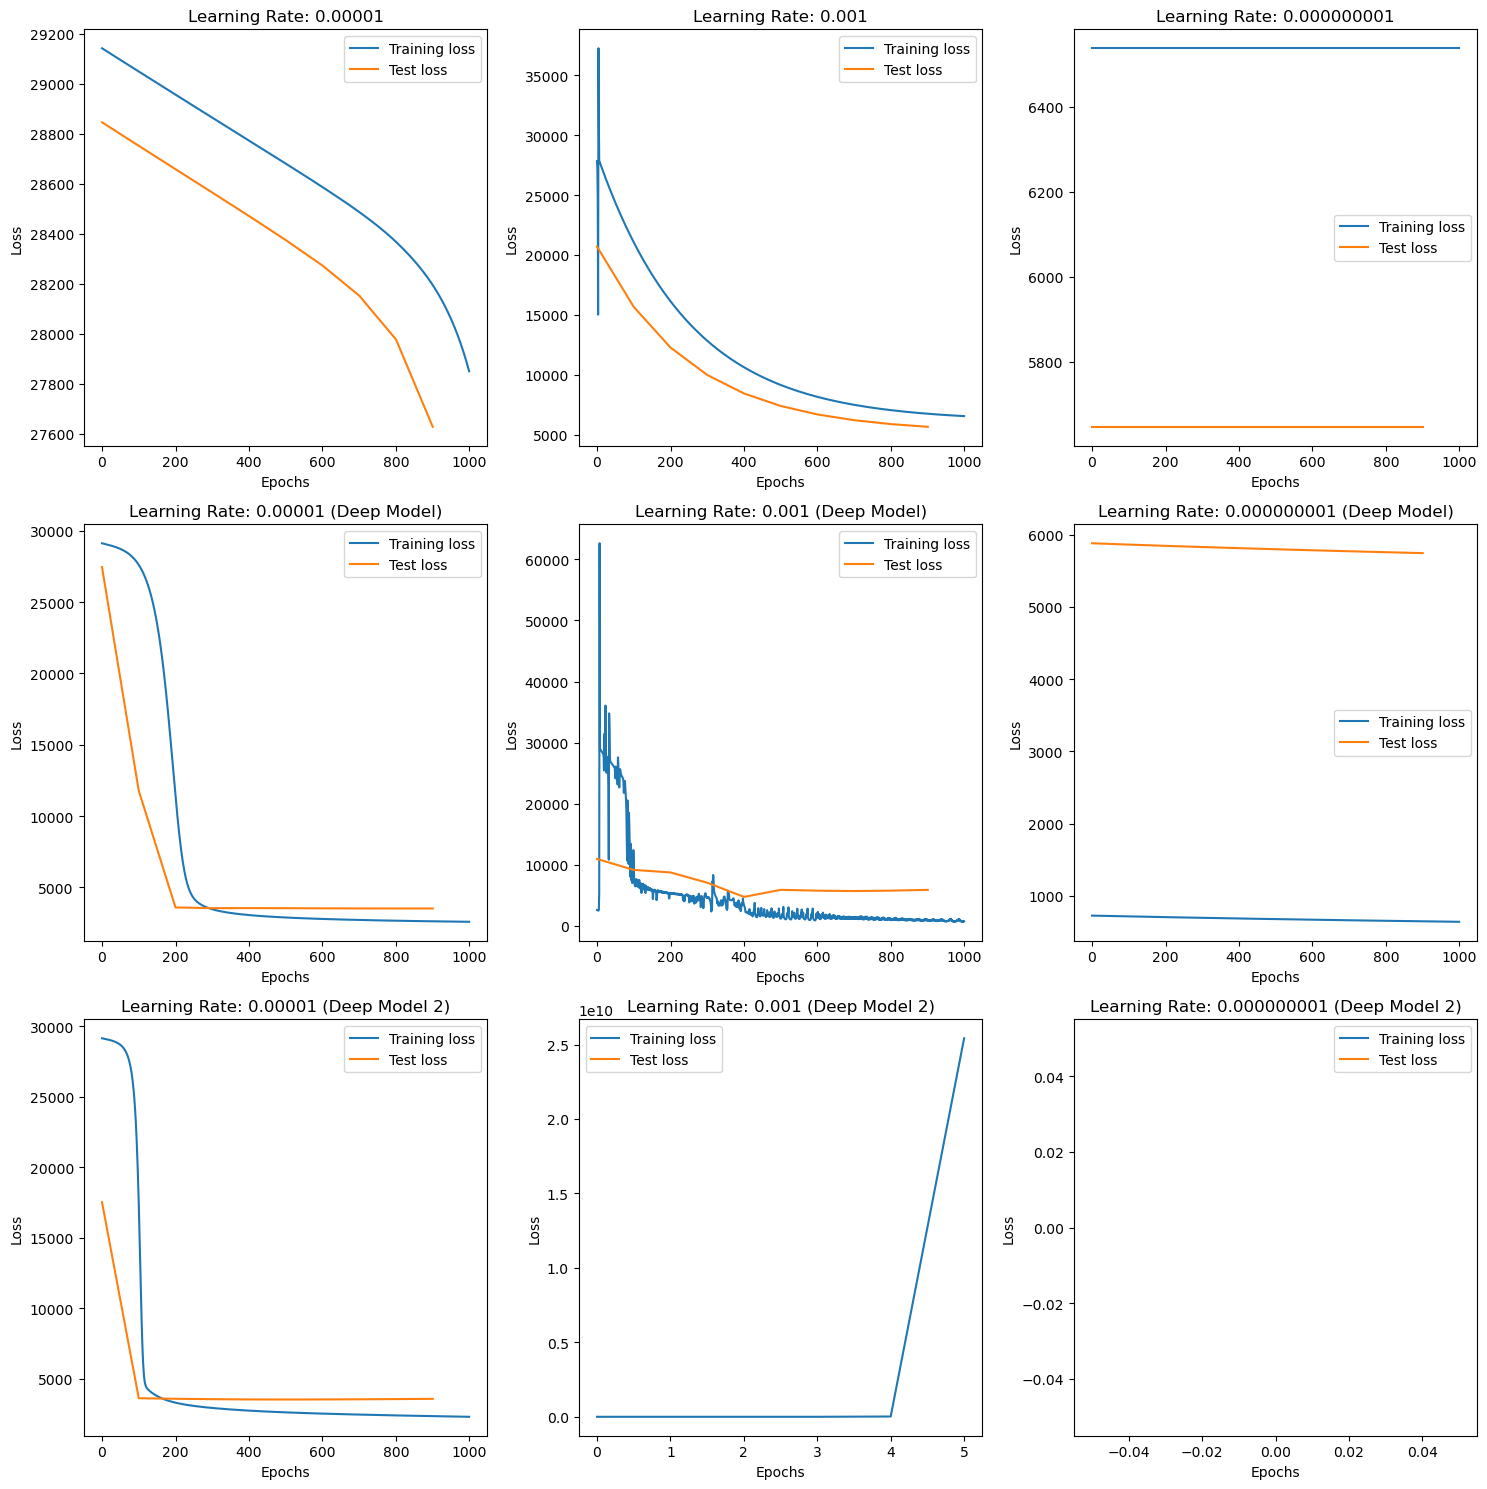

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

axes[0, 0].plot(train_losses4, label='Training loss')
axes[0, 0].plot(np.arange(0, num_epochs, 100), test_losses4, label='Test loss')
axes[0, 0].set_title('Learning Rate: 0.00001')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

axes[0, 1].plot(train_losses5, label='Training loss')
axes[0, 1].plot(np.arange(0, num_epochs, 100), test_losses5, label='Test loss')
axes[0, 1].set_title('Learning Rate: 0.001')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

axes[0, 2].plot(train_losses6, label='Training loss')
axes[0, 2].plot(np.arange(0, num_epochs, 100), test_losses6, label='Test loss')
axes[0, 2].set_title('Learning Rate: 0.000000001')
axes[0, 2].set_xlabel('Epochs')
axes[0, 2].set_ylabel('Loss')
axes[0, 2].legend()

axes[1, 0].plot(train_losses1, label='Training loss')
axes[1, 0].plot(np.arange(0, num_epochs, 100), test_losses1, label='Test loss')
axes[1, 0].set_title('Learning Rate: 0.00001 (Deep Model)')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

axes[1, 1].plot(train_losses2, label='Training loss')
axes[1, 1].plot(np.arange(0, num_epochs, 100), test_losses2, label='Test loss')
axes[1, 1].set_title('Learning Rate: 0.001 (Deep Model)')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

axes[1, 2].plot(train_losses3, label='Training loss')
axes[1, 2].plot(np.arange(0, num_epochs, 100), test_losses3, label='Test loss')
axes[1, 2].set_title('Learning Rate: 0.000000001 (Deep Model)')
axes[1, 2].set_xlabel('Epochs')
axes[1, 2].set_ylabel('Loss')
axes[1, 2].legend()

axes[2, 0].plot(train_losses7, label='Training loss')
axes[2, 0].plot(np.arange(0, num_epochs, 100), test_losses7, label='Test loss')
axes[2, 0].set_title('Learning Rate: 0.00001 (Deep Model 2)')
axes[2, 0].set_xlabel('Epochs')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

axes[2, 1].plot(train_losses8, label='Training loss')
axes[2, 1].plot(np.arange(0, num_epochs, 100), test_losses8, label='Test loss')
axes[2, 1].set_title('Learning Rate: 0.001 (Deep Model 2)')
axes[2, 1].set_xlabel('Epochs')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

axes[2, 2].plot(train_losses9, label='Training loss')
axes[2, 2].plot(np.arange(0, num_epochs, 100), test_losses9, label='Test loss')
axes[2, 2].set_title('Learning Rate: 0.000000001 (Deep Model 2)')
axes[2, 2].set_xlabel('Epochs')
axes[2, 2].set_ylabel('Loss')
axes[2, 2].legend()

plt.tight_layout()

plt.show()

### Theoretical Question

Observe and document how each architecture and learning rate affects the training and test losses. Your observations might include outcomes like incomplete training, model convergence or divergence and the loss values (on the training and testing) at the end of training. Explain the reasons behind the different behaviors observed at each learning rate.

### Your answer 

Answer: As I mentioned before, high learning rates may induce divergence, (it seems that especially for more complex models), while low rates can result in sluggish convergence, potentially entailing confinement to a local minimum. <br>
It seems that more complex models appear to exhibit heightened sensitivity to learning rates, whereas simpler models demonstrate a greater capacity to withstand a broader spectrum of learning rates without encountering severe complications. <br>
Much like various aspects of life, striking the right balance is imperative.

## Part 2: Image Classification

In [18]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

PyTorch comes with several datasets ready for use in the torchvision package. This feature is highly usefull since obtaining and preprocessing datasets can be tedious and time consuming. The following commands will download the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset to your computer. Notice the parameters for the `DataLoader` function: we specify the root folder in which the dataset will be downloaded to. We use two different datasets - one for training and one for testing. Since neural networks can easily learn complex functions, we need to test the generalization capabilities of our network using data it have not seen before. Most mertics use the test data to measure how well the network perform. The `batch_size` parameter determines the number of images and their corresponding labels in each batch.

In [19]:
# Transforms is a usefull library containing many operations on images.
# Since the MNIST dataset is stored as PIL images, we need to transform it into tensors
transform = transforms.Compose([transforms.ToTensor()])

mnist_dataset_train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_trainloader = torch.utils.data.DataLoader(mnist_dataset_train, batch_size=4, shuffle=True, num_workers=2)
mnist_dataset_test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
mnist_testloader = torch.utils.data.DataLoader(mnist_dataset_test, batch_size=4, shuffle=True, num_workers=2)

classes = [x for x in range(10)] # We use this notation for easy code recycling

We will use a simple function to display the images in our dataset. Since PyTorch saves images in a channels first format, we need to rearrange the tensor using `np.transpose()` function. The following code snippet

torch.Size([4, 1, 28, 28])
Ground Truth:     4     6     8     4


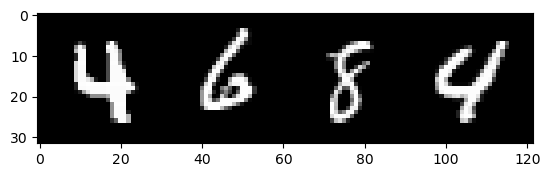

In [20]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(mnist_trainloader)
images, labels = next(dataiter)
print(images.shape)
imshow(torchvision.utils.make_grid(images))
print('Ground Truth:',' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [21]:
type(images[0][0][0]), type(labels[0])

(torch.Tensor, torch.Tensor)

In [22]:
labels

tensor([4, 6, 8, 4])

In [23]:
import torch.nn as nn
import torch.nn.functional as F

class MNIST_Net(nn.Module):
    '''
    Define the basic architecture of your network. 
    For now, you should only use fully connected layers.
    '''
    def __init__(self):
        super(MNIST_Net, self).__init__()
        n_features = 1 * 28 * 28
        self.layer1 = nn.Linear(n_features, n_features)
        self.layer2 = nn.Linear(n_features, n_features)
        self.layer3 = nn.Linear(n_features, n_features)
        self.layer4 = nn.Linear(n_features, n_features)
        self.layer5 = nn.Linear(n_features, 10)
        
    def forward(self, x):
        y_hat = None

        x = x.view(-1, 784)
        
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        y_hat = self.layer5(x)
        

        return y_hat
    
mnist_net = MNIST_Net().to(device)

In [24]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mnist_net.parameters(), lr=0.001)

In [25]:
def train_network(net, critertion, optimizer, trainloader):
    net.train()
  
    for epoch in range(2):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            
            # get the inputs from the dataloader
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()
            
            # forward + backward + optimize
            y_hat = net.forward(inputs)
            loss = criterion(y_hat, labels)
            loss.backward()
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training')
  

In [26]:
%%time
train_network(mnist_net, criterion, optimizer, mnist_trainloader)

[1,  2000] loss: 2.302
[1,  4000] loss: 2.295
[1,  6000] loss: 2.288
[1,  8000] loss: 2.275
[1, 10000] loss: 2.249
[1, 12000] loss: 2.182
[1, 14000] loss: 1.963
[2,  2000] loss: 1.206
[2,  4000] loss: 0.845
[2,  6000] loss: 0.677
[2,  8000] loss: 0.580
[2, 10000] loss: 0.529
[2, 12000] loss: 0.470
[2, 14000] loss: 0.444
Finished Training
CPU times: user 4min 27s, sys: 7min 57s, total: 12min 25s
Wall time: 2min 40s


If everything works, the loss of the network should improved over time as it learns to classify hand-written digits.
In order to measure how well the network performs, we need the test dataset.
We classify each image in the test dataset (that the network never saw) and calculate the accuracy of the network. A good model should generalize and perform well even on data that was not seen during training.

In [27]:
def calc_net_accuracy(net, testloader):
    net.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

calc_net_accuracy(mnist_net, mnist_testloader)

Accuracy of the network on the 10000 test images: 88 %


A simple network can achieve results of over 95%. Try several network architectures until you reach at least 93% accuracy.

We can also take a batch and visualize the predictions:

Ground Truth:      7     1     0     1
Predicted   :      7     1     0     1


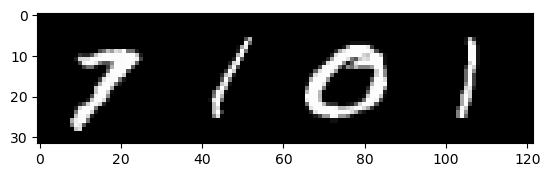

In [28]:
dataiter = iter(mnist_testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = mnist_net(images.to(device))
_, predicted = torch.max(outputs, 1)
print('Predicted   : ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

We can also check the individual classification scores for each class in the dataset.

In [29]:
def calc_class_accuracy(net, testloader):
    net.eval()
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

calc_class_accuracy(mnist_net, mnist_testloader)

Accuracy of     0 : 96 %
Accuracy of     1 : 97 %
Accuracy of     2 : 90 %
Accuracy of     3 : 87 %
Accuracy of     4 : 89 %
Accuracy of     5 : 77 %
Accuracy of     6 : 91 %
Accuracy of     7 : 86 %
Accuracy of     8 : 83 %
Accuracy of     9 : 80 %


### improvement attempts-

In [30]:
print('Lower learining rate - 0.0001:')
optimizer = optim.SGD(mnist_net.parameters(), lr=0.0001)
train_network(mnist_net, criterion, optimizer, mnist_trainloader)
calc_net_accuracy(mnist_net, mnist_testloader)

print('Higher learining rate - 0.01:')
optimizer = optim.SGD(mnist_net.parameters(), lr=0.01)
train_network(mnist_net, criterion, optimizer, mnist_trainloader)
calc_net_accuracy(mnist_net, mnist_testloader)

Lower learining rate - 0.0001:
[1,  2000] loss: 0.426
[1,  4000] loss: 0.383
[1,  6000] loss: 0.396
[1,  8000] loss: 0.384
[1, 10000] loss: 0.407
[1, 12000] loss: 0.418
[1, 14000] loss: 0.407
[2,  2000] loss: 0.400
[2,  4000] loss: 0.393
[2,  6000] loss: 0.383
[2,  8000] loss: 0.390
[2, 10000] loss: 0.391
[2, 12000] loss: 0.377
[2, 14000] loss: 0.381
Finished Training
Accuracy of the network on the 10000 test images: 89 %
Higher learining rate - 0.01:
[1,  2000] loss: 0.410
[1,  4000] loss: 0.312
[1,  6000] loss: 0.240
[1,  8000] loss: 0.219
[1, 10000] loss: 0.176
[1, 12000] loss: 0.170
[1, 14000] loss: 0.145
[2,  2000] loss: 0.114
[2,  4000] loss: 0.110
[2,  6000] loss: 0.110
[2,  8000] loss: 0.107
[2, 10000] loss: 0.104
[2, 12000] loss: 0.100
[2, 14000] loss: 0.094
Finished Training
Accuracy of the network on the 10000 test images: 96 %


In [31]:
class MNIST_Net(nn.Module):
    '''
    Define the basic architecture of your network. 
    For now, you should only use fully connected layers.
    '''
    def __init__(self):
        super(MNIST_Net, self).__init__()
        n_features = 1 * 28 * 28 # C*H*W
        self.layer1 = nn.Linear(n_features, n_features)
        self.layer2 = nn.Linear(n_features, n_features)
        self.layer3 = nn.Linear(n_features, n_features)
        self.layer4 = nn.Linear(n_features, 10)
        
    def forward(self, x):
        y_hat = None

        x = x.view(-1, 784)
        
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        y_hat = self.layer4(x)
        

        return y_hat
    
mnist_net = MNIST_Net().to(device)
print('removing layear with learining rate - 0.0001:')
optimizer = optim.SGD(mnist_net.parameters(), lr=0.0001)
train_network(mnist_net, criterion, optimizer, mnist_trainloader)
calc_net_accuracy(mnist_net, mnist_testloader)

print('removing layear with learining rate - 0.001:')
optimizer = optim.SGD(mnist_net.parameters(), lr=0.001)
train_network(mnist_net, criterion, optimizer, mnist_trainloader)
calc_net_accuracy(mnist_net, mnist_testloader)

print('removing layear with learining rate with learining rate - 0.01:')
optimizer = optim.SGD(mnist_net.parameters(), lr=0.01)
train_network(mnist_net, criterion, optimizer, mnist_trainloader)
calc_net_accuracy(mnist_net, mnist_testloader)

removing layear with learining rate - 0.0001:
[1,  2000] loss: 2.301
[1,  4000] loss: 2.299
[1,  6000] loss: 2.296
[1,  8000] loss: 2.293
[1, 10000] loss: 2.290
[1, 12000] loss: 2.288
[1, 14000] loss: 2.284
[2,  2000] loss: 2.280
[2,  4000] loss: 2.276
[2,  6000] loss: 2.273
[2,  8000] loss: 2.269
[2, 10000] loss: 2.265
[2, 12000] loss: 2.260
[2, 14000] loss: 2.255
Finished Training
Accuracy of the network on the 10000 test images: 56 %
removing layear with learining rate - 0.001:
[1,  2000] loss: 2.205
[1,  4000] loss: 2.005
[1,  6000] loss: 1.460
[1,  8000] loss: 0.926
[1, 10000] loss: 0.695
[1, 12000] loss: 0.596
[1, 14000] loss: 0.488
[2,  2000] loss: 0.452
[2,  4000] loss: 0.416
[2,  6000] loss: 0.412
[2,  8000] loss: 0.381
[2, 10000] loss: 0.366
[2, 12000] loss: 0.367
[2, 14000] loss: 0.338
Finished Training
Accuracy of the network on the 10000 test images: 90 %
removing layear with learining rate with learining rate - 0.01:
[1,  2000] loss: 0.365
[1,  4000] loss: 0.278
[1,  6000

**First of all I was able to achieve greater than 95% accuracy!**<br>
Again we saw that a more complex network was more sensitive to learning rate and the less complex network was less sensitive. But finally, for the same learning rate the same network presented the same results.

We have implemented a simple neural network in PyTorch that predicts hand-written characters that scores over 95% in a matter of seconds. Next, we try to use the same network with more complicated data. This time, we will use [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). This dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.

# CIFAR-10

In [32]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

cifar_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar_trainloader = torch.utils.data.DataLoader(cifar_trainset, batch_size=32, shuffle=True, num_workers=2)

cifar_testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
cifar_testloader = torch.utils.data.DataLoader(cifar_testset, batch_size=32, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


       car        cat      plane      truck


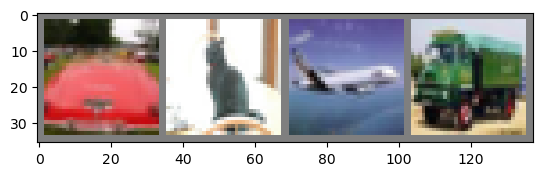

In [33]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(cifar_trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%10s' % classes[labels[j]] for j in range(4)))

In [34]:
class CIFAR_Net(nn.Module):


    def __init__(self):
        super(CIFAR_Net, self).__init__()
        n_features = 3 * 32 * 32 # C*H*W
        
        self.layer1 = nn.Linear(n_features, n_features)
        self.layer2 = nn.Linear(n_features, n_features)
        self.layer3 = nn.Linear(n_features, n_features)
        self.layer4 = nn.Linear(n_features, 10)

    def forward(self, x):
        y_hat = None
       
        x = x.view(-1, 3 * 32 * 32)
        
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        y_hat = self.layer4(x)
       
        return y_hat


cifar_net = CIFAR_Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cifar_net.parameters(), lr=0.01, momentum=0.9)

In [35]:
def train_network(net, critertion, optimizer, trainloader):
    net.train()

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    for epoch in range(15):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs from the dataloader
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()
            
            # forward + backward + optimize
            y_hat = net.forward(inputs)
            loss = criterion(y_hat, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
        print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0

    print('Finished Training')

In [36]:
train_network(cifar_net, criterion, optimizer, cifar_trainloader)

cpu
[1,  1563] loss: 1.289
[2,  1563] loss: 1.085
[3,  1563] loss: 0.976
[4,  1563] loss: 0.884
[5,  1563] loss: 0.790
[6,  1563] loss: 0.702
[7,  1563] loss: 0.614
[8,  1563] loss: 0.526
[9,  1563] loss: 0.440
[10,  1563] loss: 0.369
[11,  1563] loss: 0.302
[12,  1563] loss: 0.254
[13,  1563] loss: 0.214
[14,  1563] loss: 0.185
[15,  1563] loss: 0.157
Finished Training


In [37]:
calc_net_accuracy(cifar_net, cifar_testloader)

Accuracy of the network on the 10000 test images: 54 %


GroundTruth:      cat    ship    ship   plane    frog    frog     car    frog
Predicted:       deer    ship   plane   plane    frog    frog     car    frog


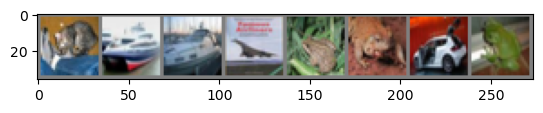

In [38]:
dataiter = iter(cifar_testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images[:8]))
print('GroundTruth: ', ' '.join('%7s' % classes[labels[j]] for j in range(8)))

outputs = cifar_net(images[:8].to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted:   ', ' '.join('%7s' % classes[predicted[j]]for j in range(8)))

While we can predicting MNIST data with 95%+ accuracy, we are only able to predict less than half of the CIFAR-10 dataset using the same architecture. The reason is that CIFAR-10 data is more complicated, and we need a more powerful network to handle this data.